## Regressão Múltipla

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [13]:
dataset = pd.read_csv('../0_datasets/house_prices.csv')
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [23]:
dataset.drop(labels=['id','date'], axis=1, inplace=True)
dataset.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


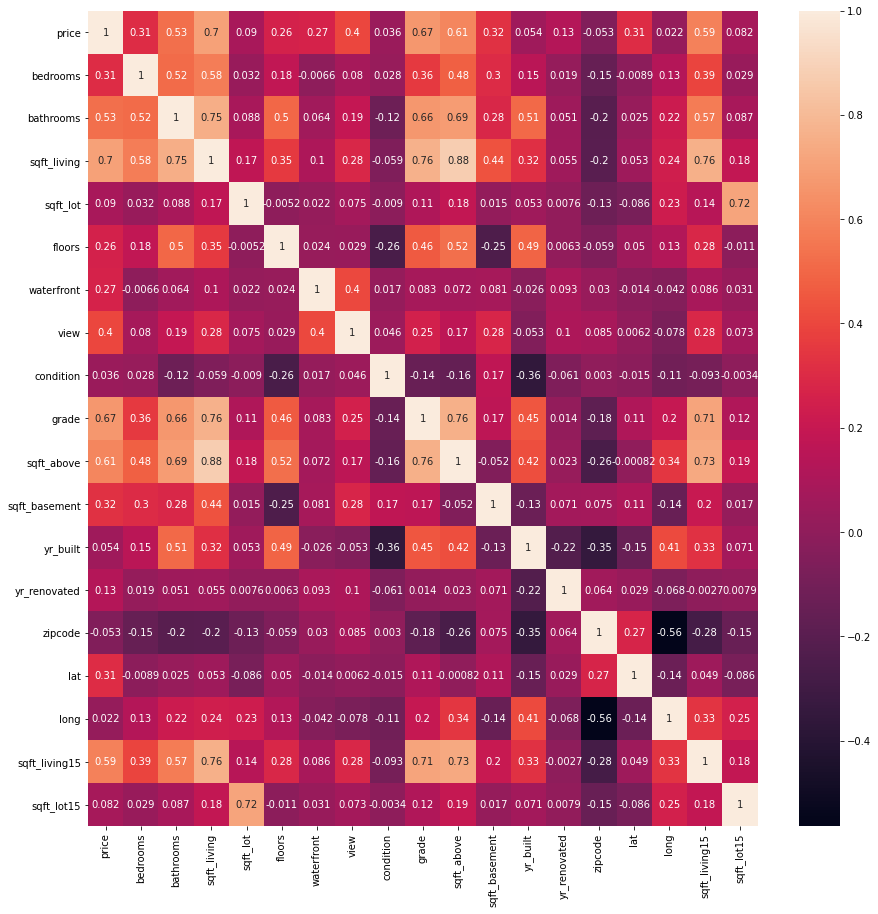

In [24]:
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(dataset.corr(), annot=True)

In [25]:
X = dataset.iloc[:, [2,3,9,10]].values
X

array([[1.00e+00, 1.18e+03, 7.00e+00, 1.18e+03],
       [2.25e+00, 2.57e+03, 7.00e+00, 2.17e+03],
       [1.00e+00, 7.70e+02, 6.00e+00, 7.70e+02],
       ...,
       [7.50e-01, 1.02e+03, 7.00e+00, 1.02e+03],
       [2.50e+00, 1.60e+03, 8.00e+00, 1.60e+03],
       [7.50e-01, 1.02e+03, 7.00e+00, 1.02e+03]])

In [40]:
y = dataset.iloc[:, 0].values
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [28]:
from sklearn.model_selection import train_test_split
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.2, random_state=1)

In [29]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_treinamento, y_treinamento)

LinearRegression()

In [30]:
regressor.score(X_teste, y_teste)

0.5433655885394326

#### Métricas de erros

In [31]:
previsoes = regressor.predict(X_teste)
previsoes, y_teste

(array([ 767214.78818336,  384435.01287134,  973843.30037746, ...,
         524186.77329123, 1374550.60270932,  357590.851349  ]),
 array([ 459000.,  445000., 1057000., ...,  260000., 1795000.,  418000.]))

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [33]:
mean_absolute_error(y_teste, previsoes)

163331.28566448082

In [34]:
mean_squared_error(y_teste, previsoes)

78815542841.3002

In [35]:
math.sqrt(mean_squared_error(y_teste, previsoes))

280741.06012712175

(array([2., 0., 0., 0., 0., 1., 0., 0., 0., 1.]),
 array([   3. ,  198.7,  394.4,  590.1,  785.8,  981.5, 1177.2, 1372.9,
        1568.6, 1764.3, 1960. ]),
 <BarContainer object of 10 artists>)

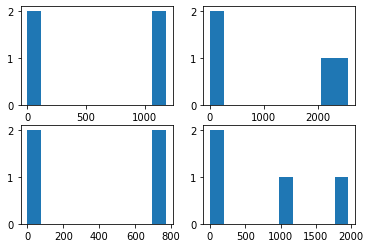

In [36]:
f, ax = plt.subplots(2,2)
ax[0,0].hist(X[0])
ax[0,1].hist(X[1])
ax[1,0].hist(X[2])
ax[1,1].hist(X[3])

(array([1.9021e+04, 2.1480e+03, 3.1600e+02, 9.0000e+01, 2.6000e+01,
        4.0000e+00, 4.0000e+00, 1.0000e+00, 1.0000e+00, 2.0000e+00]),
 array([  75000.,  837500., 1600000., 2362500., 3125000., 3887500.,
        4650000., 5412500., 6175000., 6937500., 7700000.]),
 <BarContainer object of 10 artists>)

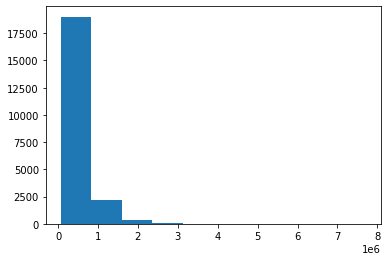

In [41]:
plt.hist(y)

In [42]:
y = np.log(y)

(array([6.300e+01, 5.330e+02, 3.977e+03, 7.183e+03, 6.345e+03, 2.541e+03,
        7.330e+02, 1.930e+02, 3.800e+01, 7.000e+00]),
 array([11.22524339, 11.68839214, 12.15154089, 12.61468964, 13.07783839,
        13.54098714, 14.00413589, 14.46728464, 14.93043339, 15.39358214,
        15.85673089]),
 <BarContainer object of 10 artists>)

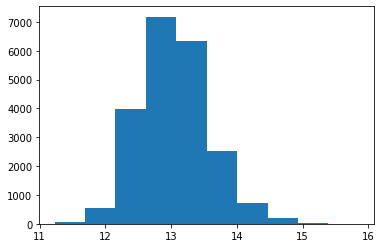

In [43]:
plt.hist(y)